In [123]:
import numpy as np

from scipy.stats import norm
from scipy.special import factorial
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(228)
sns.set()
from tqdm.autonotebook import tqdm

%matplotlib inline

In [119]:
def plot_func(els, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(list(range(len(els))), els)
    plt.title(title)
    plt.xlabel('k')
    plt.ylabel('MSE')

## Равномерное распределение

$$
\begin{align}
\theta_k^* = \sqrt[k] {(k + 1) \overline{X^k}}
\end{align}
$$

In [150]:
def get_mse_k_uniform(theta, k_max=140, size=1000):
    num_iter = 100
    mse_k = []
    for k in tqdm(list(range(1, k_max+1))):
        diffs = []
        for i in range(num_iter):
            sample = np.random.uniform(0, theta, size=size)
            param = np.power((k+1)*np.mean(np.power(sample, k)),1/k)
            diffs.append(np.square(param - theta))
        mse_k.append(np.sqrt(np.mean(diffs)))
    return mse_k

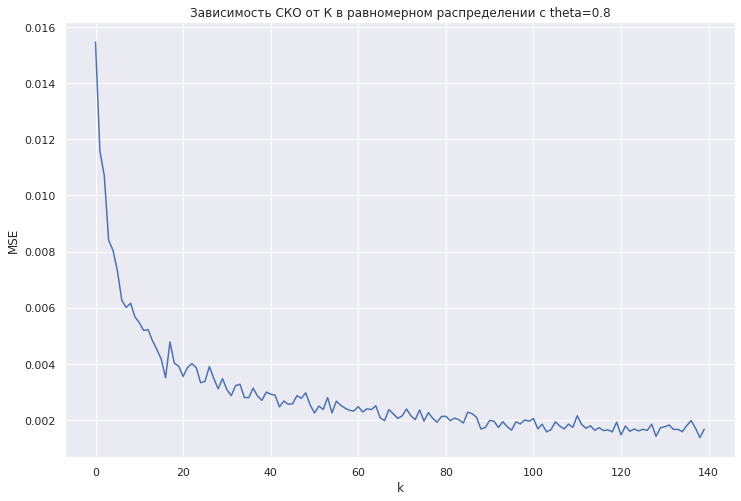

In [152]:
theta = 0.8
plot_func(get_mse_k_uniform(theta), f'Зависимость СКО от К в равномерном распределении с theta={theta}')

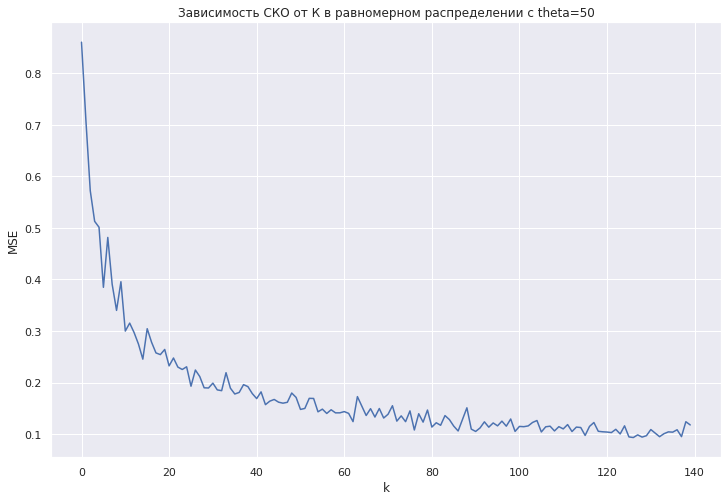

In [153]:
theta = 50
plot_func(get_mse_k_uniform(theta), f'Зависимость СКО от К в равномерном распределении с theta={theta}')

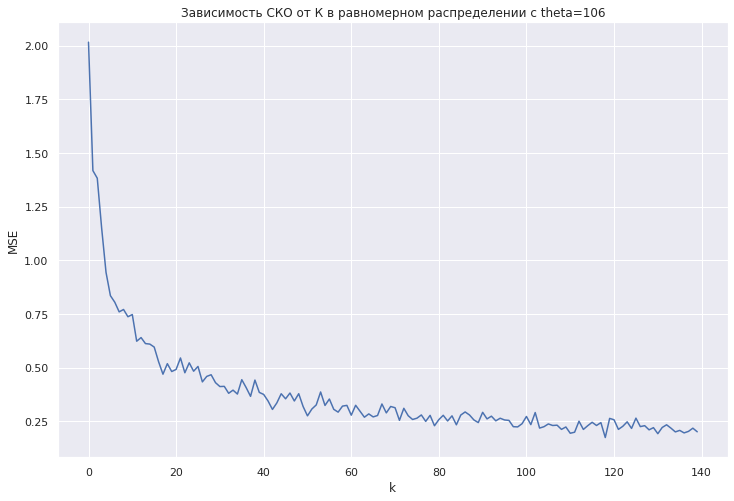

In [154]:
theta = 106
plot_func(get_mse_k_uniform(theta), f'Зависимость СКО от К в равномерном распределении с theta={theta}')

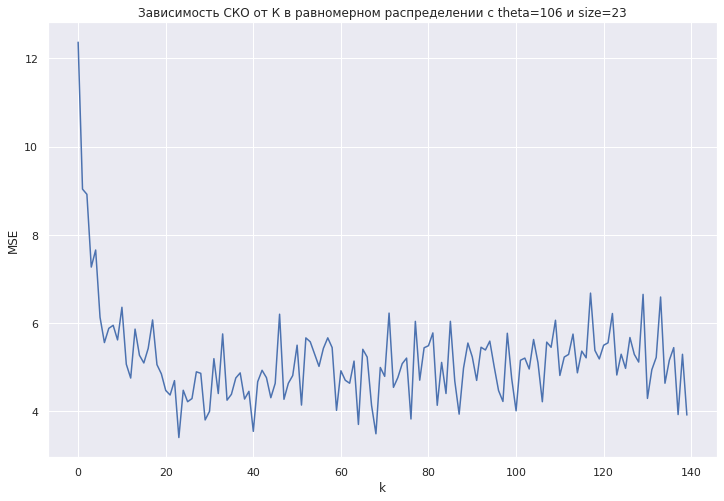

In [157]:
plot_func(get_mse_k_uniform(theta, size=23), f'Зависимость СКО от К в равномерном распределении с theta={theta} и size={23}')

Как видно из графиков, при k >= 100 среднеквадратичная ошибка уже практически не падает, до этого увеличение k существенно влияет на точность. Так же на размер ошибки значительно влияет само значение theta, чем оно больше, тем больше ошибка. При этом зависимость от k в любом случае выглядит примерно похожим образом.

Также из последнего графика видно, что при небольшом размере выборки тенденция уменьшения MSE при увеличении k остается, но начиная с какого-то k получаем крайне нейустойчивую картину, и падение ошибки заканчивается.

## Экспоненциальное распределение

$$
\begin{align}
\theta_k^* = \left(\frac{\overline{X^k}}{k!} \right)^{-1/k}
\end{align}
$$

In [148]:
def get_mse_k_exponential(theta, k_max=140, size=1000):
    num_iter = 100
    mse_k = []
    for k in tqdm(list(range(1, k_max+1))):
        diffs = []
        for i in range(num_iter):
            sample = np.random.exponential(theta, size=size)
            param = np.power(np.mean(np.power(sample, k))/int(factorial(k)),1/k)
            diffs.append(np.square(param - theta))
        mse_k.append(np.sqrt(np.mean(diffs)))
    return mse_k

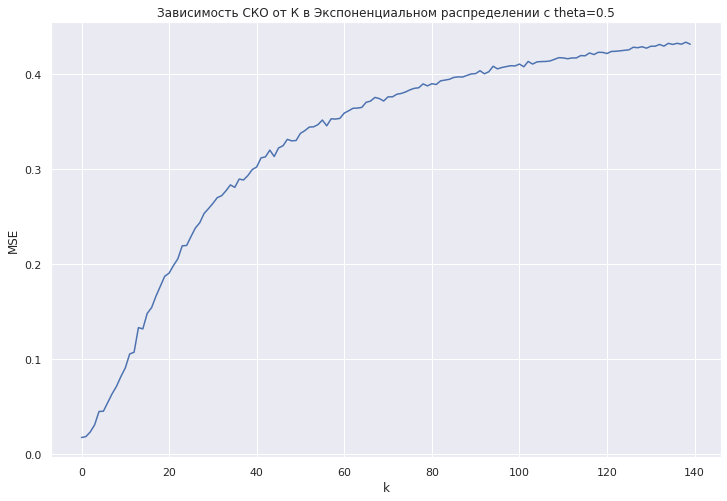

In [143]:
theta = 0.5
plot_func(get_mse_k_exponential(theta), f"Зависимость СКО от К в Экспоненциальном распределении с theta={theta}")

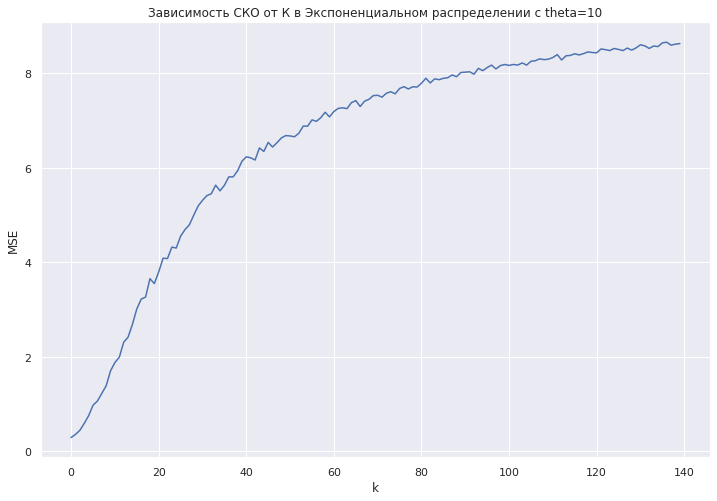

In [144]:
theta = 10
plot_func(get_mse_k_exponential(theta), f"Зависимость СКО от К в Экспоненциальном распределении с theta={theta}")

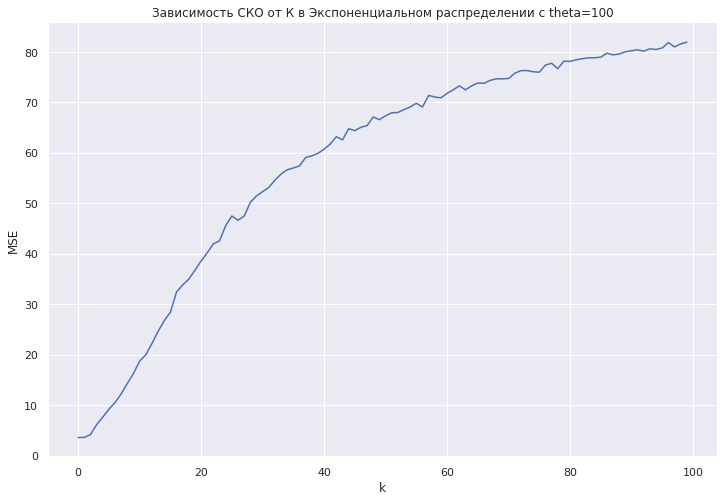

In [146]:
theta = 100
plot_func(get_mse_k_exponential(theta, k_max=100), f"Зависимость СКО от К в Экспоненциальном распределении с theta={theta}")

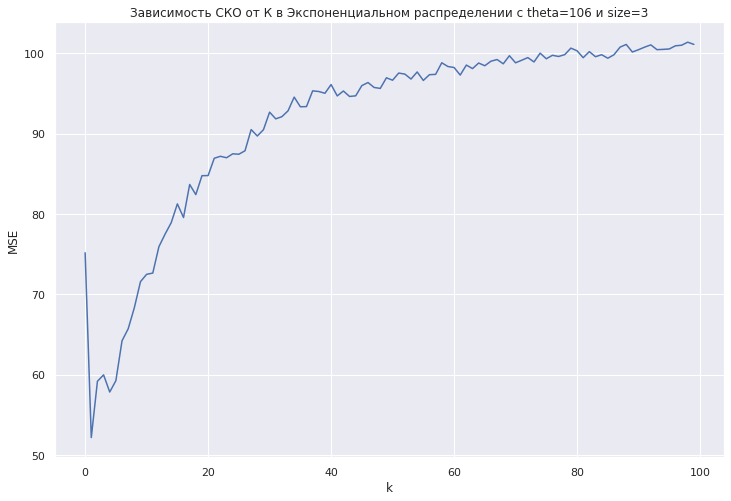

In [163]:
plot_func(get_mse_k_exponential(theta, k_max=100, size=3), f"Зависимость СКО от К в Экспоненциальном распределении с theta={theta} и size={3}")

In [147]:
get_mse_k_exponential(theta, k_max=20)

[3.4401605920287257,
 3.4931549348042816,
 4.502280123020915,
 5.905127042947984,
 7.561629606155681,
 9.045858893468264,
 10.431478025788937,
 13.626271073084125,
 13.572071819873036,
 15.815022777245455,
 18.04245749358543,
 21.03443707918076,
 22.176609873194973,
 23.7773320002615,
 27.058807772401018,
 28.63247065274943,
 31.229753387300164,
 33.355048438286104,
 35.82850452617365,
 36.72782317516873]

Как видно из графиков, при возрастании k ошибка лишь увеличивается, при этом стремясь к значению параметра, т.е. оцененный параметр стремится к 0. На это может влиять возведение в степень и факториал в формуле. 

При этом, при совсем небольших размерах выборок (чуть больше 1), минимум ошибки достигается не на первом моменте, а на моменте чуть большего порядка, возможно только в таких случаях и стоит применять эту формулу, а не просто пользоваться простейшим первым моментом.